In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def gen_ito(a, b, dt, mu, sig, x0=0.1, xlim=100):
    lnspc = [a]
    cur_t = a
    dx = [x0]
    #dx[0] = x0
    cur_x = x0
    #dt = (t[-1]-t[0])/len(t)
    while (np.abs(cur_x) < xlim) and (cur_t<=b):
        cur_t += dt
        lnspc.append(cur_t)
        dx.append((mu(cur_x, cur_t) * dt) + (sig(cur_x, cur_t) * np.random.normal(0, 1)*np.sqrt(dt)))
        cur_x += dx[-1]
    return (np.array(lnspc), np.array(dx), np.cumsum(dx))

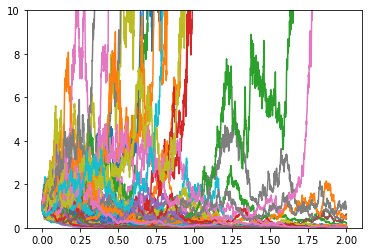

In [34]:
dt = 1/1000
a=0
b=2
for i in range(100):
    t, dx, x = gen_ito(a, b, dt, (lambda x, t: -x*(1-x)), (lambda x, t: 2*x), x0=1, xlim=100)
    plt.plot(t, x)
    plt.ylim(0, 10)
plt.show()